
# Rapport de machine learning

Cette partie de notre rapport contient l'ensemble des expérimentations qui ont été faites dans le cadre des TP de machine learning de SIEC. Le but a alors été de faire une analyse poussée des moyens de mises en oeuvre des méthodes de clustering non-supervisées étudiées en cours.

## Importations 

Cette partie est à exécuter pour le bon fonctionnement de l'ensemble du TP. Il est également nécessaire de télécharger le dossier 'artificial' dans le dossier courant. 

In [2]:
from scipy.io import arff

import numpy as np
import matplotlib . pyplot as plt
import time
import scipy.cluster.hierarchy as shc

from sklearn import cluster
from sklearn import metrics
from sklearn import datasets

from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# dossiers contenant l'ensemble des dataset étudiés
path = './artificial/' 
pathbis = './dataset-rapport/' 

## Visualisation des jeux de données

Nous utilisons la visualisation des données de l'exemple pour analyser différents jeux de données. Cela nous permettra ensuite de déterminer l'algorithme de clusterisation qui fonctionnera le mieux sur chacun d'entre eux.  

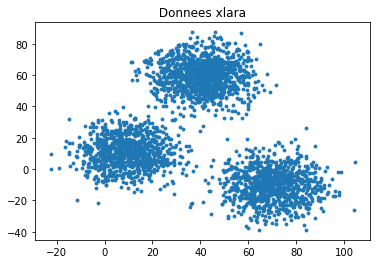

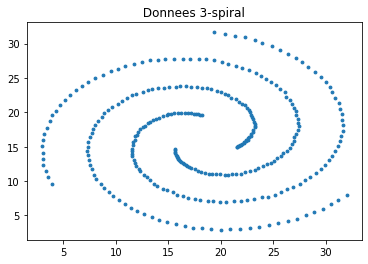

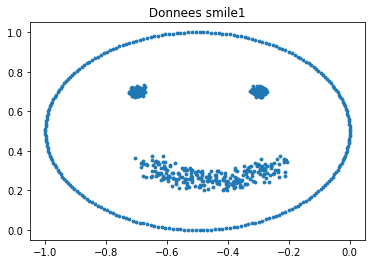

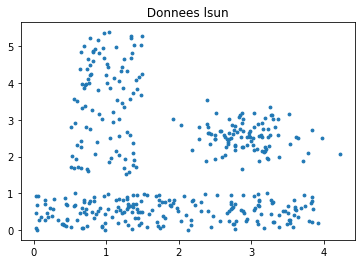

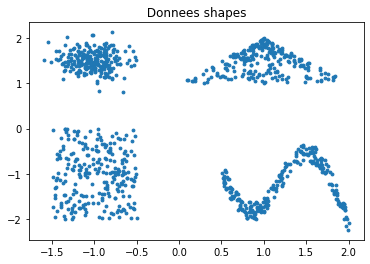

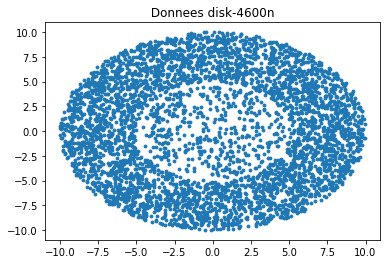

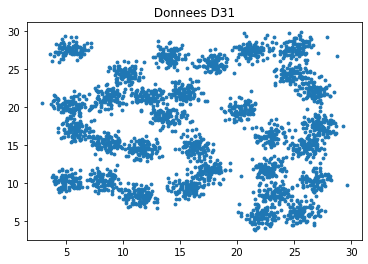

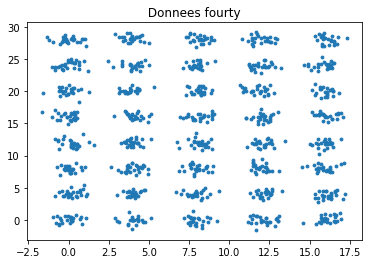

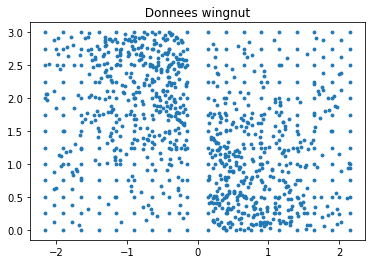

In [49]:
data = arff.loadarff ( open ( path+"xclara.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt.scatter( f0, f1 , s = 8 )
plt.title( " Donnees xlara " )
plt.show()

data = arff.loadarff ( open ( path+"3-spiral.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt.scatter( f0, f1 , s = 8 )
plt.title( " Donnees 3-spiral " )
plt.show()

data = arff.loadarff ( open ( path+"smile1.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt.scatter( f0, f1 , s = 8 )
plt.title( " Donnees smile1 " )
plt.show()

data = arff.loadarff ( open ( path+"lsun.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt.scatter( f0, f1 , s = 8 )
plt.title( " Donnees lsun " )
plt.show()

data = arff.loadarff ( open ( path+"shapes.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt.scatter( f0, f1 , s = 8 )
plt.title( " Donnees shapes " )
plt.show()

data = arff.loadarff ( open ( path+"disk-4600n.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt.scatter( f0, f1 , s = 8 )
plt.title( " Donnees disk-4600n " )
plt.show()

data = arff.loadarff ( open ( path+"D31.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt.scatter( f0, f1 , s = 8 )
plt.title( " Donnees D31 " )
plt.show()

data = arff.loadarff ( open ( path+"fourty.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt.scatter( f0, f1 , s = 8 )
plt.title( " Donnees fourty " )
plt.show()

data = arff.loadarff ( open ( path+"wingnut.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt.scatter( f0, f1 , s = 8 )
plt.title( " Donnees wingnut " )
plt.show()


## Clustering k-Means et k-Medoids

### Intérêts de la méthode k-Means

#### Application de la méthode 

Nous choisissons les jeux de données "xclara" et "shapes" car lorque nous visualisons les données nous pouvons identifier des clusters par rapport à la distance entre les points. Cela correspond donc bien au fonctionnement de K-means qui base sa méthode sur le caclul des distances entre les points un centre.

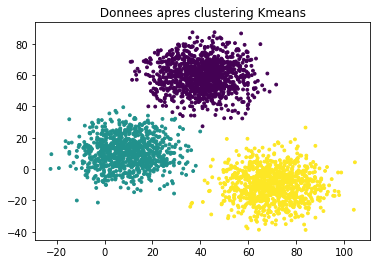

 nb clusters =  3  , nb iter =  3  ,runtime =  41.85  ms 


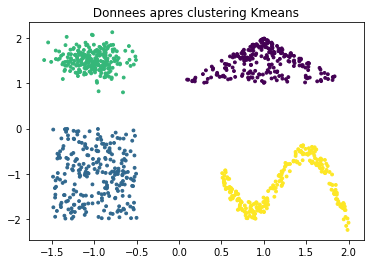

 nb clusters =  4  , nb iter =  2  ,runtime =  37.58  ms 


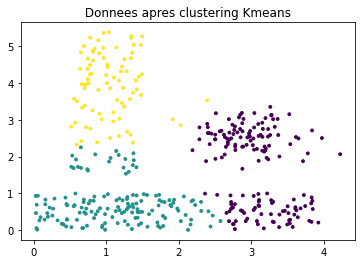

 nb clusters =  3  , nb iter =  8  ,runtime =  31.25  ms 


In [34]:
# Application de K-means sur la jeu de donnée xclara : 
k = 3
data = arff.loadarff ( open ( path+"xclara.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)

tps1 = time . time ()
model = cluster . KMeans ( n_clusters =k , init = 'k-means++')
model.fit ( datanp )
tps2 = time.time ()
labels = model.labels_
iteration = model.n_iter_
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees apres clustering Kmeans " )
plt . show ()
print ( " nb clusters = " ,k , " , nb iter = " , iteration , " ,runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )


# Application de K-means sur la jeu de donnée shapes : 
k = 4
data = arff.loadarff ( open ( path+"shapes.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)

tps1 = time . time ()
model = cluster . KMeans ( n_clusters =k , init = 'k-means++')
model.fit ( datanp )
tps2 = time.time ()
labels = model.labels_
iteration = model.n_iter_
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees apres clustering Kmeans " )
plt . show ()
print ( " nb clusters = " ,k , " , nb iter = " , iteration , " ,runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )

# Application de K-means sur la jeu de donnée lsun : 
k = 3
data = arff.loadarff ( open ( path+"lsun.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)

tps1 = time . time ()
model = cluster . KMeans ( n_clusters =k , init = 'k-means++')
model.fit ( datanp )
tps2 = time.time ()
labels = model.labels_
iteration = model.n_iter_
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees apres clustering Kmeans " )
plt . show ()
print ( " nb clusters = " ,k , " , nb iter = " , iteration , " ,runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )



Nous constatons que la méthode K-means fonctionne bien sur ces deux jeux de données. On relève tout de même le besoin de bien visualier les données pour identifier en amont le nombre de clusters. 

#### Etude des métriques

Nous utilisons la métrique "Silouhette" afin de valider le meilleur nombre de clusters pour le jeu de donnée "shapes". Plus ce coefficient est proche de 1 et plus le nombre de clusters est optimal. Alors, nous garderons le nombre de clusters pour lequel le score est le plus proche de 1.

In [15]:
# Avoir 2 clusters
k = 2
data = arff.loadarff ( open ( path+"shapes.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datanp)
labels = kmeans_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("Score obtenu avec k = 2 : ", score)


# Avoir 3 clusters
k = 3
data = arff.loadarff ( open ( path+"shapes.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datanp)
labels = kmeans_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("Score obtenu avec k = 3 : ", score)


# Avoir 4 clusters
k = 4
data = arff.loadarff ( open ( path+"shapes.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datanp)
labels = kmeans_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("Score obtenu avec k = 4 : ", score)


# Avoir 5 clusters
k = 5
data = arff.loadarff ( open ( path+"shapes.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datanp)
labels = kmeans_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("Score obtenu avec k = 5 : ", score)

Score obtenu avec k = 2 :  0.5305545278224536
Score obtenu avec k = 3 :  0.5868172229463942
Score obtenu avec k = 4 :  0.6945464131654676
Score obtenu avec k = 5 :  0.6558465241094414


Nous constatons alors que le nombre de clusters le plus optimal est de 4. Cela correspond bien à l'analyse que l'on peut faire en visualisant les données du dataset. Ainsi, nous en déduisons que utiliser cette métrique est un bon moyen de connaitre le nombre de clusters le plus optimal pour appliquer la méthode sans avoir à visualiser les données avant. 

#### Temps d'exécution

Le temps d'exécution sur 10 itérations est : 
- au max : 38.55ms 
- au min : 21.10ms 
- en moyenne : 25.77 ms

### Limites de la méthode k-Means

Nous prennons ici les jeux de donnée "smile1" et "3-spiral". Ces deux datasets ont l'inconvénient de ne pas être conposés de données pouvant être centrés autour d'un point. Les clusters ne pourront donc pas être identifiés par K-means de manière cohérente. Alors, il serait nécessaire de considérer une méthode étant capable de prendre en compte la densité de points dans une zone de l'espace. 

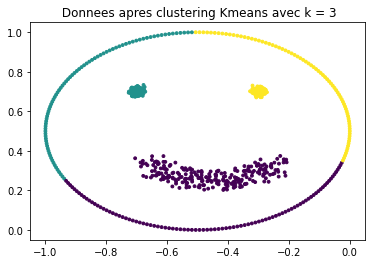

 nb clusters =  3  , nb iter =  6


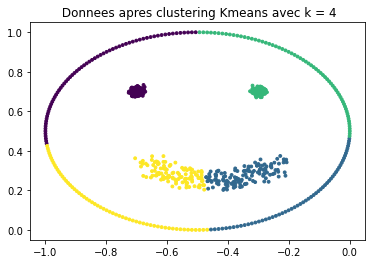

 nb clusters =  4  , nb iter =  16


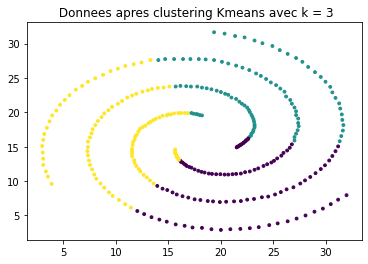

 nb clusters =  3  , nb iter =  10


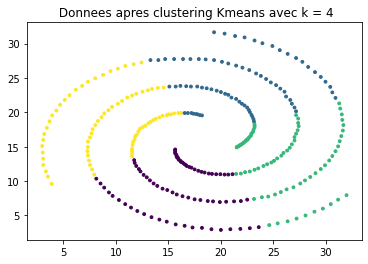

 nb clusters =  4  , nb iter =  11


In [4]:
# Application de K-means sur la jeu de donnée smile1 : 
data = arff.loadarff ( open ( path+"smile1.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

k = 3 # avec 3 clusters
model = cluster . KMeans ( n_clusters =k , init = 'k-means++')
model.fit ( datanp )
labels = model.labels_
iteration = model.n_iter_
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees apres clustering Kmeans avec k = 3")
plt . show ()
print ( " nb clusters = " ,k , " , nb iter = " , iteration )

k = 4 # avec 4 clusters
model = cluster . KMeans ( n_clusters =k , init = 'k-means++')
model.fit ( datanp )
labels = model.labels_
iteration = model.n_iter_
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees apres clustering Kmeans avec k = 4")
plt . show ()
print ( " nb clusters = " ,k , " , nb iter = " , iteration )



# Application de K-means sur la jeu de donnée 3-spiral : 
data = arff.loadarff ( open ( path+"3-spiral.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

k = 3 # avec 3 clusters
model = cluster . KMeans ( n_clusters =k , init = 'k-means++')
model.fit ( datanp )
labels = model.labels_
iteration = model.n_iter_
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees apres clustering Kmeans avec k = 3")
plt . show ()
print ( " nb clusters = " ,k , " , nb iter = " , iteration )

k = 4 # avec 4 clusters
model = cluster . KMeans ( n_clusters =k , init = 'k-means++')
model.fit ( datanp )
labels = model.labels_
iteration = model.n_iter_
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees apres clustering Kmeans avec k = 4")
plt . show ()
print ( " nb clusters = " ,k , " , nb iter = " , iteration )

Nous constatons bien que les clusters sont mal identifiés avec la méthode K-means. Ici, DBSCAN serait une meilleure méthode car basée sur la densité de points.

## Clustering agglomératif

### Intérêts de la méthode

#### Aplication n°1

 Dendrogramme 'single' donnees 3-spiral 


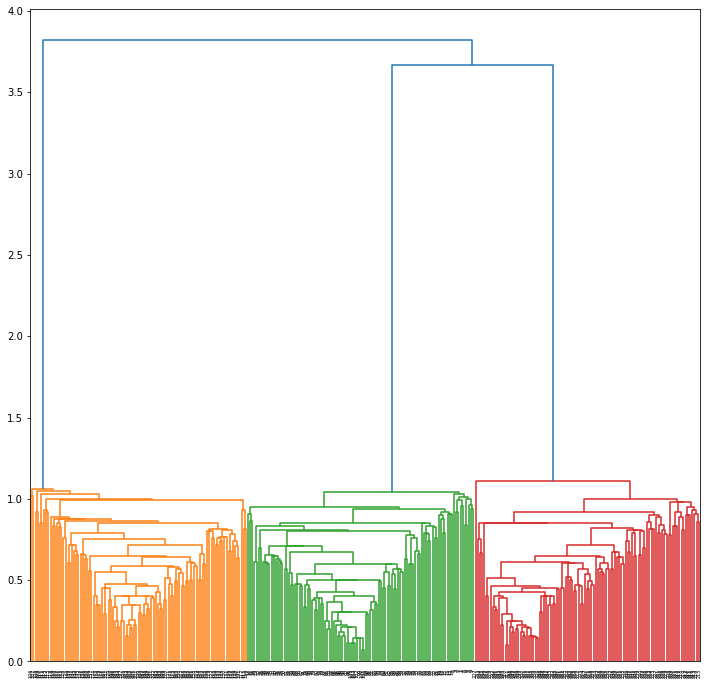

In [78]:
# Application de  la méthode sur le jeu de donnée 3-spiral : 
data = arff.loadarff ( open ( path+"3-spiral.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Dendogramme correpondant
print ( " Dendrogramme 'single' donnees 3-spiral " )
linked_mat = shc . linkage ( datanp , 'single')
plt . figure ( figsize = ( 12 , 12 ) )
shc . dendrogram ( linked_mat , orientation = 'top' , distance_sort = 'descending' , show_leaf_counts = False )
plt . show ()


Le dendogramme nous permet de déterminer le nombre de clusters à imposer qui serait le plus pertinent. Ici, nous voyons que 3 clusters serait la mieux pour appliquer la méthode sur le dataset 3-spiral. 

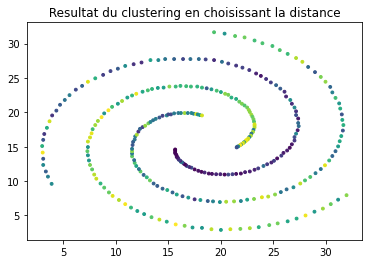

 nb clusters =  312  , nb feuilles =  312  runtime =  10.01  ms 


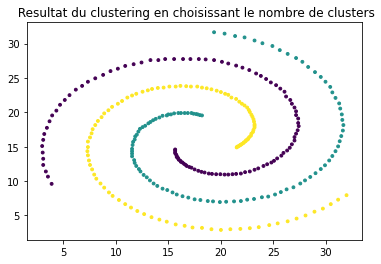

 nb clusters =  3  , nb feuilles =  312  runtime =  0.0  ms 


In [79]:
# set distance_threshold ( 0 ensures we compute the full tree )
tps1 = time .time ()
model = cluster.AgglomerativeClustering ( distance_threshold = 0 , linkage = 'single' , n_clusters = None )
model = model . fit ( datanp )
tps2 = time . time ()
labels = model . labels_
k = model . n_clusters_
leaves = model . n_leaves_

# Affichage clustering
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Resultat du clustering en choisissant la distance " )
plt . show ()
print ( " nb clusters = " ,k , " , nb feuilles = " , leaves , " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )


# set the number of clusters
k = 3
tps1 = time . time ()
model = cluster.AgglomerativeClustering ( linkage = 'single' , n_clusters = k )
model = model . fit ( datanp )
tps2 = time . time ()
labels = model . labels_
kres = model . n_clusters_
leaves = model . n_leaves_


# Affichage clustering
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Resultat du clustering en choisissant le nombre de clusters" )
plt . show ()
print ( " nb clusters = " ,k , " , nb feuilles = " , leaves , " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )


Nous voyons que la méthode fonctionne effectivement quand on fixe le nombre de clusters à 3. De plus, ici la méthode fonctionne bien avec la spirale (contrairement à K-means). On peut expliquer cela par le fait que en opposition à K-means on compare les distances des points de proche en proche et non par rapport à un centre.

#### Aplication n°2

 Dendrogramme 'single' donnees smile1


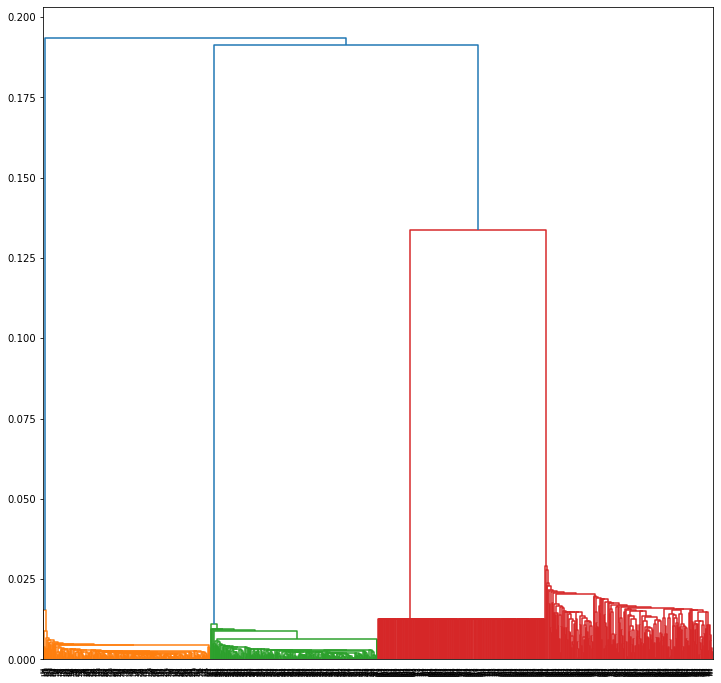

In [10]:
# Application de la méthode sur le jeu de donnée smile1 : 
data = arff.loadarff ( open ( path+"smile1.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Dendogramme correpondant
print ( " Dendrogramme 'single' donnees smile1" )
linked_mat = shc . linkage ( datanp , 'single')
plt . figure ( figsize = ( 12 , 12 ) )
shc . dendrogram ( linked_mat , orientation = 'top' , distance_sort = 'descending' , show_leaf_counts = False )
plt . show ()

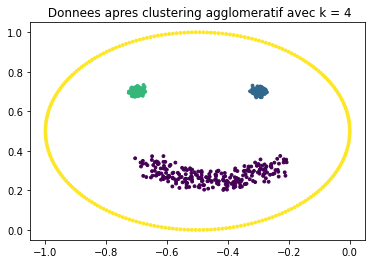

 nb clusters =  4  , nb feuilles =  1000  runtime =  23.1  ms 


In [12]:
# set the number of clusters
k = 4
tps1 = time . time ()
model = cluster.AgglomerativeClustering ( linkage = 'single' , n_clusters = k )
model = model . fit ( datanp )
tps2 = time . time ()
labels = model . labels_
kres = model . n_clusters_
leaves = model . n_leaves_


# Affichage clustering
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees apres clustering agglomeratif avec k = 4" )
plt . show ()
print ( " nb clusters = " ,k , " , nb feuilles = " , leaves , " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )


Là aussi la méthode fonctionne mieux que k-means.

### Limites de la méthode

#### Aplication n°1

 Dendrogramme 'single' donnees D31


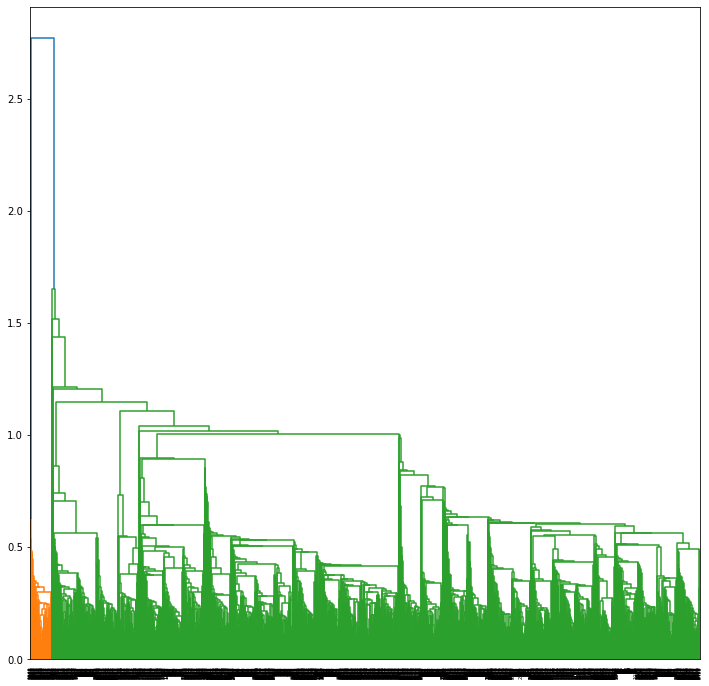

In [38]:
# Application de la méthode sur le jeu de donnée D31 : 
data = arff.loadarff ( open ( path+"D31.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Dendogramme correpondant
print ( " Dendrogramme 'single' donnees D31" )
linked_mat = shc . linkage ( datanp , 'single')
plt . figure ( figsize = ( 12 , 12 ) )
shc . dendrogram ( linked_mat , orientation = 'top' , distance_sort = 'descending' , show_leaf_counts = False )
plt . show ()

Le dendogramme nous permet de voir que 2 clusters serait la mieux pour appliquer la méthode sur le dataset single.

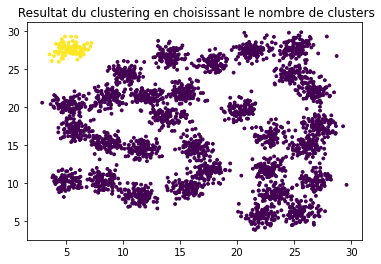

 nb clusters =  2  , nb feuilles =  3100  runtime =  83.92  ms 


In [66]:
# set the number of clusters
k = 2
tps1 = time . time ()
model = cluster.AgglomerativeClustering ( linkage = 'single' , n_clusters = k )
model = model . fit ( datanp )
tps2 = time . time ()
labels = model . labels_
kres = model . n_clusters_
leaves = model . n_leaves_


# Affichage clustering
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Resultat du clustering en choisissant le nombre de clusters" )
plt . show ()
print ( " nb clusters = " ,k , " , nb feuilles = " , leaves , " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )

Nous voyons que la méthode ne fonctionne pas correctement quand on fixe le nombre de clusters à 2. Nous pouvons alors que finalement le Dendogramme n'est pas pertinent sur ce dataset. Cela peut être expliqué par le fonctionnement de cette méthode : lorsque deux cluster sont combinés, il n'est pas possible de les redissocier. Alors, le cluster violet que l'on peut observer pourrait être découpé en plusieurs clusters mais ne l'est pas. 

#### Aplication n°2

 Dendrogramme 'single' donnees disk-4600


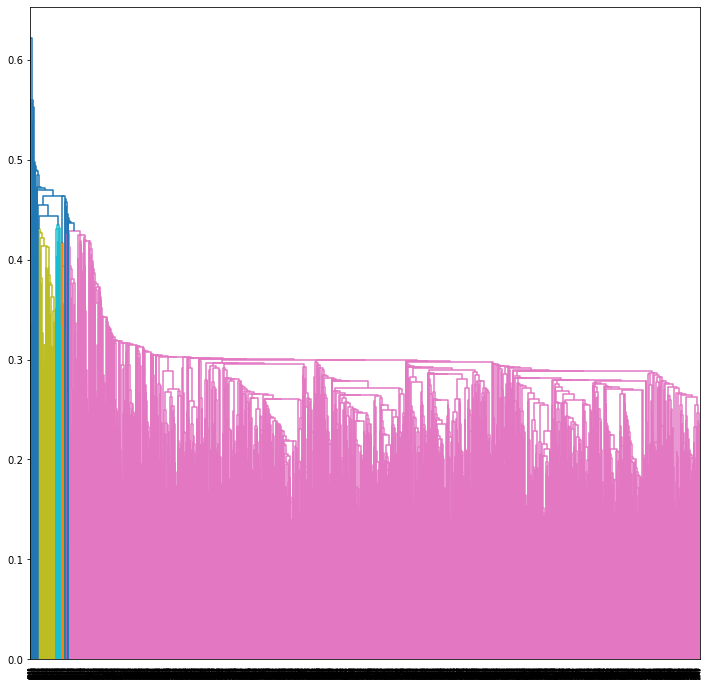

In [56]:
# Application de la méthode sur le jeu de donnée disk-4600n : 
data = arff.loadarff ( open ( path+"disk-4600n.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Dendogramme correpondant
print ( " Dendrogramme 'single' donnees disk-4600" )
linked_mat = shc . linkage ( datanp , 'single')
plt . figure ( figsize = ( 12 , 12 ) )
shc . dendrogram ( linked_mat , orientation = 'top' , distance_sort = 'descending' , show_leaf_counts = False )
plt . show ()

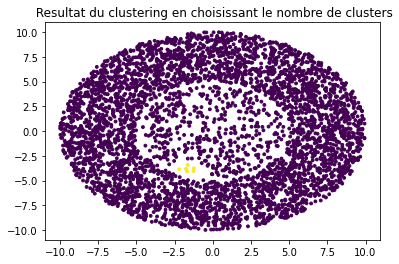

 nb clusters =  2  , nb feuilles =  4600  runtime =  178.45  ms 


In [52]:
# set the number of clusters
k = 2
tps1 = time . time ()
model = cluster.AgglomerativeClustering ( linkage = 'single' , n_clusters = k )
model = model . fit ( datanp )
tps2 = time . time ()
labels = model . labels_
kres = model . n_clusters_
leaves = model . n_leaves_


# Affichage clustering
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Resultat du clustering en choisissant le nombre de clusters" )
plt . show ()
print ( " nb clusters = " ,k , " , nb feuilles = " , leaves , " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )

Ici aussi la méthode ne semble pas fonctionner correctement. Le dataset disk-4600n est constitué d'un grand nombre de "outiliers" au centre du disque. Ces derniers posent alors problème à l'algorithme.

## Clustering DBSCAN

## Intérêts de la méthode DBSCAN

### Evaluation de la méthode 

#### Application n°1

score DBSCAN =  0.31616369710429626
Estimated number of clusters: 39
Estimated number of noise points: 356
Durée d'éxecution :  19.03  ms 


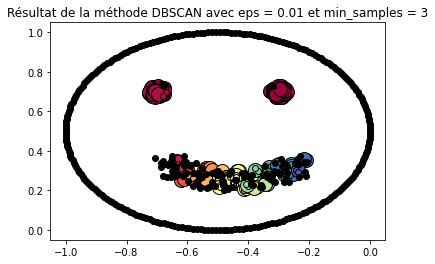

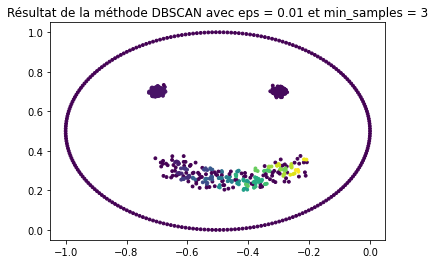

In [76]:
# Application de DBSCAN sur le jeu de donnée smile1 : 
data = arff.loadarff ( open ( path+"smile1.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Lancement de l'algorithme 
eps = 0.01
min_samples = 3
tps1 = time.time()
model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()

# Analyse du résultat
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')

print("score DBSCAN = ", score)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms ")

# Affichage des clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = datanp[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    xy = datanp[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
plt.title(f"Résultat de la méthode DBSCAN avec eps = {eps} et min_samples = {min_samples}")
plt.show()


# Affichage clustering
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt.title(f"Résultat de la méthode DBSCAN avec eps = {eps} et min_samples = {min_samples}")
plt . show ()


score DBSCAN =  0.5054942636304086
Estimated number of clusters: 4
Estimated number of noise points: 0
Durée d'éxecution :  16.79  ms 


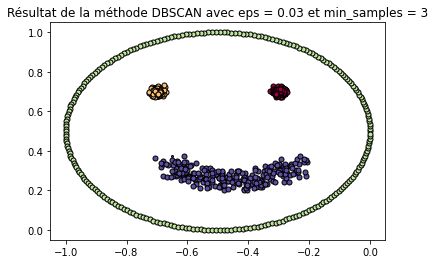

In [24]:
# Application de DBSCAN sur le jeu de donnée smile1 : 
data = arff.loadarff ( open ( path+"smile1.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Lancement de l'algorithme 
eps = 0.03
min_samples = 3
tps1 = time.time()
model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()

# Analyse du résultat
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')

print("score DBSCAN = ", score)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms ")

# Affichage des clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = datanp[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=5,
    )
    xy = datanp[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )
plt.title(f"Résultat de la méthode DBSCAN avec eps = {eps} et min_samples = {min_samples}")
plt.show()

Nous obtenons un score de silouhette d'environ 0,3 quand eps = 0.01 et min_samples = 3 alors que ce score est à 0,5 quand eps = 0.03 et min_samples = 3. Nous en déduisons donc que les premiers paramètres sont les plus justes. Nous confirmons alors cela en affichant les clusters dans les deux cas. La méthode fonctionne alors correctement sur ce dataset dès lors qu'on fixe correctement les parmètres d'entrée en nous basant sur les métriques d'évaluation.

#### Application n°2

score DBSCAN =  0.7180915044625334
Estimated number of clusters: 40
Estimated number of noise points: 18
Durée d'éxecution :  16.29  ms 


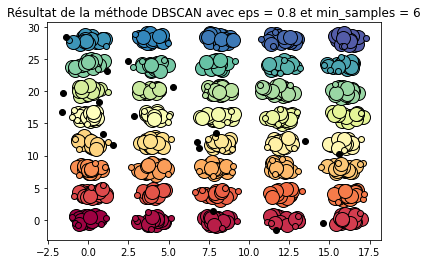

In [31]:
# Application de DBSCAN sur le jeu de donnée  fourty : 
data = arff.loadarff ( open ( path+"fourty.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Lancement de l'algorithme 
eps = 0.8
min_samples = 6
tps1 = time.time()
model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()

# Analyse du résultat
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')

print("score DBSCAN = ", score)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms ")

# Affichage des clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = datanp[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    xy = datanp[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
plt.title(f"Résultat de la méthode DBSCAN avec eps = {eps} et min_samples = {min_samples}")
plt.show()

score DBSCAN =  0.7283742459594283
Estimated number of clusters: 40
Estimated number of noise points: 1
Durée d'éxecution :  0.0  ms 


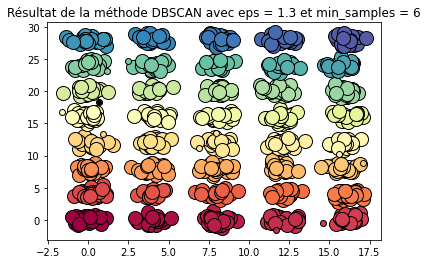

In [109]:
# Application de DBSCAN sur le jeu de donnée  fourty : 
data = arff.loadarff ( open ( path+"fourty.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Lancement de l'algorithme 
eps = 1.3
min_samples = 6
tps1 = time.time()
model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()

# Analyse du résultat
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')

print("score DBSCAN = ", score)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms ")

# Affichage des clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = datanp[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    xy = datanp[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
plt.title(f"Résultat de la méthode DBSCAN avec eps = {eps} et min_samples = {min_samples}")
plt.show()

Cette deuxième application nous permet de comprendre comment DBSCAN permet de plus ou moins prendre en compte de bruit dans la construction des cluster en jouant sur les paramètres. On peut décider d'extraire ces points isolés ou au contraire, dans le cadre du clustering, de les intégrer dans les clusters en jouant la distance au plus proche voisin. 

#### Application n°3

score DBSCAN =  0.6945464131654676
Estimated number of clusters: 4
Estimated number of noise points: 0
Durée d'éxecution :  4.89  ms 


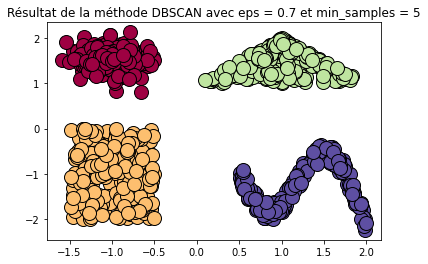

In [80]:
# Application de DBSCAN sur le jeu de donnée ...... : 
data = arff.loadarff ( open ( path+"shapes.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Lancement de l'algorithme 
eps = 0.7
min_samples = 5
tps1 = time.time()
model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()

# Analyse du résultat
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')

print("score DBSCAN = ", score)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms ")

# Affichage des clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = datanp[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    xy = datanp[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor= tuple(col), #"k",
        markersize=6,
    )
plt.title(f"Résultat de la méthode DBSCAN avec eps = {eps} et min_samples = {min_samples}")
plt.show()

### Analyse de la distance au k plus proches voisins

#### Application n°1

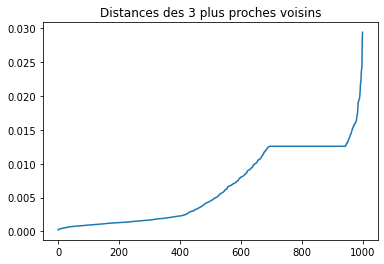

In [98]:
# Application de DBSCAN sur le jeu de donnée smile1 : 
data = arff.loadarff ( open ( path+"smile1.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne


# Distances k plus proches voisins
k = 3
neigh = NearestNeighbors ( n_neighbors = k )
neigh.fit ( datanp )
distances , indices = neigh.kneighbors (datanp)
newDistances = np.asarray ( [ np . average ( distances [ i ] [ 1 : ] ) for i in range (0 , distances.shape[ 0 ])])
trie = np.sort( newDistances )
plt.title (f"Distances des {k} plus proches voisins")
plt.plot ( trie ) ;
plt.show ()

Cette analyse nous permet de nous rendre mieux compte de l'ordre de grandeur que le paramètre eps pourrait prendre. Ici, nous voyons que pour un eps = 0.03, l'ensemble des points seront capables de trouves 3 plus proches voisins.  

#### Application n°2

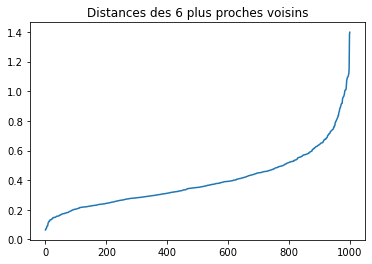

In [103]:
# Application de DBSCAN sur le jeu de donnée fourty : 
data = arff.loadarff ( open ( path+"fourty.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne


# Distances k plus proches voisins
k = 6
neigh = NearestNeighbors ( n_neighbors = k )
neigh.fit ( datanp )
distances , indices = neigh.kneighbors (datanp)
newDistances = np.asarray ( [ np . average ( distances [ i ] [ 1 : ] ) for i in range (0 , distances.shape[ 0 ])])
trie = np.sort( newDistances )
plt.title (f"Distances des {k} plus proches voisins")
plt.plot ( trie ) ;
plt.show ()

Cette courbe nous permet de faire le même constat que dans l'application n°1. 

#### Application n°3

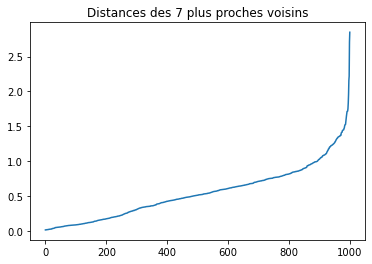

In [68]:
# Application de DBSCAN sur le jeu de donnée D31: 
data = arff.loadarff ( open ( path+"rings.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne


# Distances k plus proches voisins
k = 7
neigh = NearestNeighbors ( n_neighbors = k )
neigh.fit ( datanp )
distances , indices = neigh.kneighbors (datanp)
newDistances = np.asarray ( [ np . average ( distances [ i ] [ 1 : ] ) for i in range (0 , distances.shape[ 0 ])])
trie = np.sort( newDistances )
plt.title (f"Distances des {k} plus proches voisins")
plt.plot ( trie ) ;
plt.show ();

### Limites de la méthode DBSCAN

Nous prenons l'exemple du dataset "wingnut". On peut alors interpréter de deux manières différentes la répartition : soit deux colonnes de part et d'autre du centre, soit en considérant uniquement les zones à forte densité. 

score DBSCAN =  0.4116528610863132
Estimated number of clusters: 2
Estimated number of noise points: 54
Durée d'éxecution :  16.97  ms 


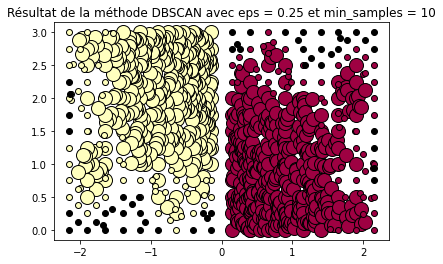

In [111]:
# Application de DBSCAN sur le jeu de donnée  wingnut : 
data = arff.loadarff ( open ( path+"wingnut.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Lancement de l'algorithme 
eps = 0.25
min_samples = 10
tps1 = time.time()
model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()

# Analyse du résultat
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')

print("score DBSCAN = ", score)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms ")

# Affichage des clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = datanp[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    xy = datanp[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
plt.title(f"Résultat de la méthode DBSCAN avec eps = {eps} et min_samples = {min_samples}")
plt.show()

score DBSCAN =  0.3033176334277373
Estimated number of clusters: 1
Estimated number of noise points: 4
Durée d'éxecution :  15.99  ms 


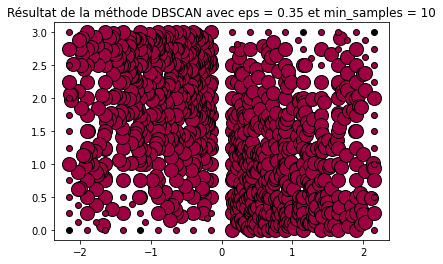

In [113]:
# Application de DBSCAN sur le jeu de donnée  wingnut : 
data = arff.loadarff ( open ( path+"wingnut.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Lancement de l'algorithme 
eps = 0.35
min_samples = 10
tps1 = time.time()
model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()

# Analyse du résultat
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')

print("score DBSCAN = ", score)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms ")

# Affichage des clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = datanp[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    xy = datanp[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
plt.title(f"Résultat de la méthode DBSCAN avec eps = {eps} et min_samples = {min_samples}")
plt.show()

Ici, la méthode n'est plus capable de distinguer des clusters. Nous constatons donc bien que la méthode est limitée en fonction des valeurs que les paramètres d'entrée prennent. Affiner le choix des paramètres peut effectivement s'avérer délicat et changer complètement l'interprétation de la répartition. De plus, si les clusters sont très différents en termes de densités, la méthode n'est pas très adaptée car la construction des clusters dépend des paramètres eps et min_samples. Or, on n'applique qu'une seule fois ces paramètres à l'algorithme, celui-ci ne peut pas bien se généraliser aux clusters ayant des densités très différentes. 

## Comparaisons des performances

In [131]:
data = arff.loadarff ( open ( path+"shapes.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)

# Kmeans 
k = 4
tps1 = time.time()
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datanp)
tps2 = time.time()
labels = kmeans_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("KMEANS")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")


# Agglomératif
k = 4
tps1 = time . time ()
agglo_model = cluster.AgglomerativeClustering (linkage='single', n_clusters=k).fit(datanp)
tps2 = time . time ()
labels = agglo_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("AGGLOMERATIF")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")


# DBSCAN
eps = 0.7
min_samples = 5
tps1 = time.time()
dbscan_model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()
labels = dbscan_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("DBSCAN")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")



KMEANS
- Score :  0.6945464131654676
- Durée d'éxecution :  37.79  ms 

AGGLOMERATIF
- Score :  0.6945464131654676
- Durée d'éxecution :  15.64  ms 

DBSCAN
- Score :  0.6945464131654676
- Durée d'éxecution :  9.01  ms 



Nous constatons alors que sur un dataset où les trois méthodes sont capables d'obtenir le même résultats, les performances ne sont pas exactement les mêmes. En effet, nous obtenons avec les trois méthodes 4 clusters mais les temps d'exécutions ne sont pas les mêmes : DBSCAN étant le plus rapide et K-means le plus lent. 

## Comparaison de la qualité de résultats

### Application sur smile1

ETUDE DES DISTANCES


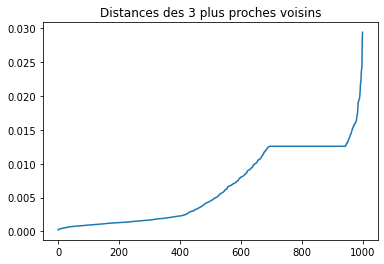

KMEANS
- Score :  0.6393006957752178
- Durée d'éxecution :  54.06  ms 



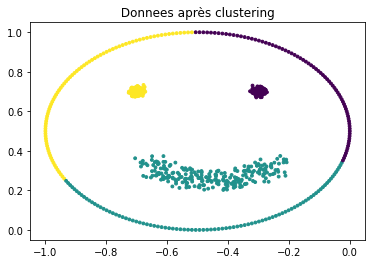

AGGLOMERATIF
- Score :  0.4557331133192218
- Durée d'éxecution :  15.78  ms 



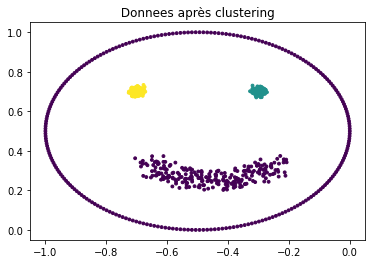

DBSCAN
- Score :  0.5054942636304086
- Durée d'éxecution :  10.02  ms
- Nombre de clusters : 4
- Nombre de points de bruit : 0


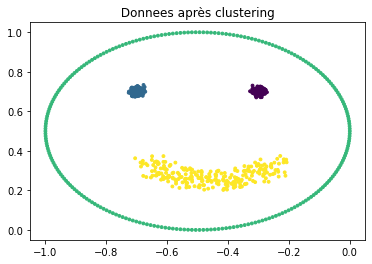

In [118]:
data = arff.loadarff ( open ( path+"smile1.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Distances k plus proches voisins
k = 3
neigh = NearestNeighbors ( n_neighbors = k ).fit ( datanp )
distances , indices = neigh.kneighbors (datanp)
newDistances = np.asarray ( [ np . average ( distances [ i ] [ 1 : ] ) for i in range (0 , distances.shape[ 0 ])])
trie = np.sort( newDistances )
print("ETUDE DES DISTANCES")
plt.title (f"Distances des {k} plus proches voisins")
plt.plot ( trie ) ;
plt.show ();


# Kmeans 
k = 3
tps1 = time.time()
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datanp)
tps2 = time.time()
labels = kmeans_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("KMEANS")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering " )
plt . show ()


# Agglomératif
k = 3
tps1 = time . time ()
agglo_model = cluster.AgglomerativeClustering (linkage='single', n_clusters=k).fit(datanp)
tps2 = time . time ()
labels = agglo_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("AGGLOMERATIF")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering " )
plt . show ()


# DBSCAN
eps = 0.03
min_samples = 3
tps1 = time.time()
dbscan_model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()
labels = dbscan_model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("DBSCAN")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms")
print("- Nombre de clusters : %d" % n_clusters_)
print("- Nombre de points de bruit : %d" % n_noise_)
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering " )
plt . show ()


### Application sur xclara

ETUDE DES DISTANCES


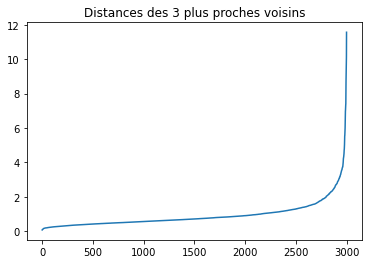

KMEANS
- Score :  0.6945587736089913
- Durée d'éxecution :  53.28  ms 



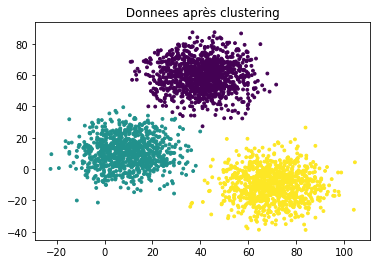

AGGLOMERATIF
- Score :  0.02996091241427347
- Durée d'éxecution :  69.58  ms 



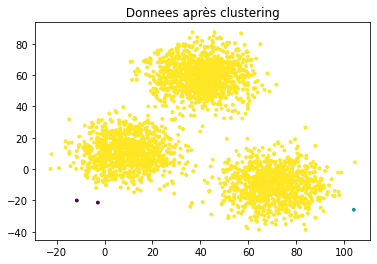

DBSCAN
- Score :  0.5122557776803203
- Durée d'éxecution :  18.08  ms
- Nombre de clusters : 5
- Nombre de points de bruit : 47


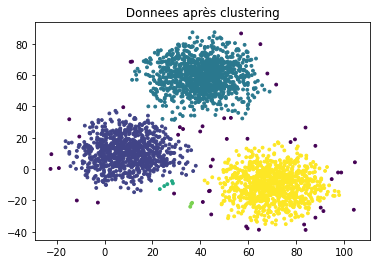

In [119]:
data = arff.loadarff ( open ( path+"xclara.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Distances k plus proches voisins
k = 3
neigh = NearestNeighbors ( n_neighbors = k ).fit ( datanp )
distances , indices = neigh.kneighbors (datanp)
newDistances = np.asarray ( [ np . average ( distances [ i ] [ 1 : ] ) for i in range (0 , distances.shape[ 0 ])])
trie = np.sort( newDistances )
print("ETUDE DES DISTANCES")
plt.title (f"Distances des {k} plus proches voisins")
plt.plot ( trie ) ;
plt.show ();


# Kmeans 
k = 3
tps1 = time.time()
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datanp)
tps2 = time.time()
labels = kmeans_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("KMEANS")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering " )
plt . show ()


# Agglomératif
k = 3
tps1 = time . time ()
agglo_model = cluster.AgglomerativeClustering (linkage='single', n_clusters=k).fit(datanp)
tps2 = time . time ()
labels = agglo_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("AGGLOMERATIF")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering " )
plt . show ()


# DBSCAN
eps = 4
min_samples = 3
tps1 = time.time()
dbscan_model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()
labels = dbscan_model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("DBSCAN")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms")
print("- Nombre de clusters : %d" % n_clusters_)
print("- Nombre de points de bruit : %d" % n_noise_)
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering " )
plt . show ()


## Analyse sur fourty

ETUDE DES DISTANCES


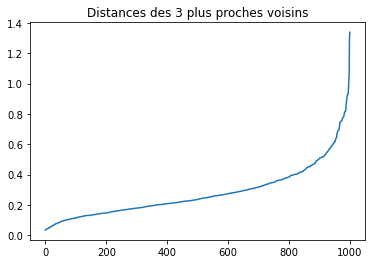

KMEANS
- Score :  0.7373305306497581
- Durée d'éxecution :  184.45  ms 



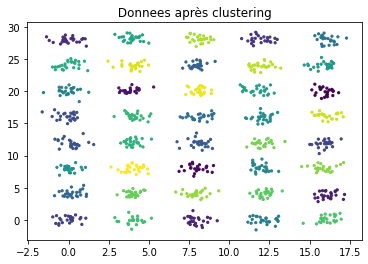

AGGLOMERATIF
- Score :  0.7373305306497581
- Durée d'éxecution :  0.0  ms 



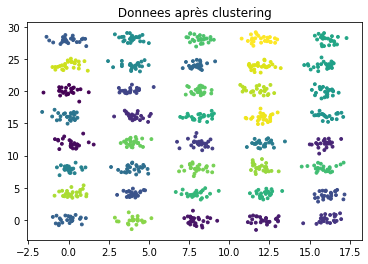

DBSCAN
- Score :  0.7090913032310584
- Durée d'éxecution :  16.92  ms
- Nombre de clusters : 40
- Nombre de points de bruit : 24


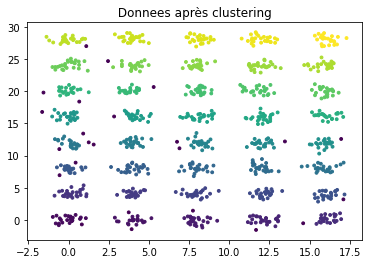

In [130]:
data = arff.loadarff ( open ( path+"fourty.arff" , 'r') )
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in data [ 0 ] ]
datanp = np.array(datanp)
f0 = datanp[: , 0] # tous les elements de la premiere colonne
f1 = datanp[: , 1] # tous les elements de la deuxieme colonne

# Distances k plus proches voisins
k = 3
neigh = NearestNeighbors ( n_neighbors = k ).fit ( datanp )
distances , indices = neigh.kneighbors (datanp)
newDistances = np.asarray ( [ np . average ( distances [ i ] [ 1 : ] ) for i in range (0 , distances.shape[ 0 ])])
trie = np.sort( newDistances )
print("ETUDE DES DISTANCES")
plt.title (f"Distances des {k} plus proches voisins")
plt.plot ( trie ) ;
plt.show ();


# Kmeans 
k = 40
tps1 = time.time()
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datanp)
tps2 = time.time()
labels = kmeans_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("KMEANS")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")
plt . scatter ( f0 , f1 , c = labels , s = 5 )
plt . title ( " Donnees après clustering " )
plt . show ()


# Agglomératif
k = 40
tps1 = time . time ()
agglo_model = cluster.AgglomerativeClustering (linkage='single', n_clusters=k).fit(datanp)
tps2 = time . time ()
labels = agglo_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("AGGLOMERATIF")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering " )
plt . show ()


# DBSCAN
eps = 0.7
min_samples = 3
tps1 = time.time()
dbscan_model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()
labels = dbscan_model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("DBSCAN")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms")
print("- Nombre de clusters : %d" % n_clusters_)
print("- Nombre de points de bruit : %d" % n_noise_)
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering " )
plt . show ()


## Conclusion

K-means :
- clusters uniquement autour d'un point
- besoin de connaitre le nombre de clusters
- temps de calcul un peu long

Agglomératif :
- clusters construits par des points de proche en proche
- pas de modifications des clusters, pas de réajustements

DBSCAN : 
- clusters construits par des densité de points
- paramètres difficiles à fixer, besoin d'une analyse des données en amont
- temps de calcul très faible

Indicateurs :
- coefficient de silouhette = indicateur de la pertinence des clusters
- dendogramme = indicateurs du nombre de clusters à fixer
- k plus proches voisins = indicateurs des distances moyennes entre les points d'un dataset

## Comparaison des méthodes sur le nouveau dataset

ETUDE DES DISTANCES


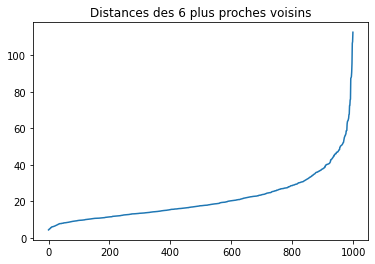

KMEANS
- Score :  0.6374250001552915
- Durée d'éxecution :  57.8  ms 



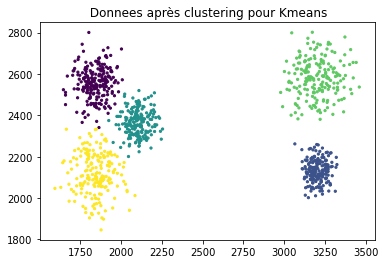

AGGLOMERATIF
- Score :  0.26386965636085824
- Durée d'éxecution :  10.97  ms 



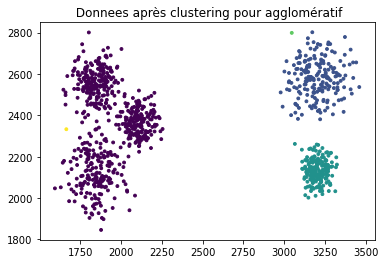

DBSCAN
- Score :  0.6025792518489175
- Durée d'éxecution :  11.0  ms
- Nombre de clusters : 5
- Nombre de points de bruit : 35


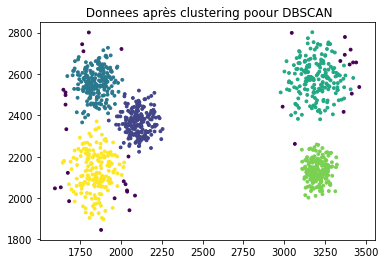

In [69]:
databrut = np.loadtxt(pathbis+'y1.txt')
datanp = [[x[0], x[1]] for x in databrut ]
f0 = [ f[0] for f in datanp]
f1 = [ f[1] for f in datanp]

# Distances k plus proches voisins
k = 2
neigh = NearestNeighbors ( n_neighbors = k ).fit ( datanp )
distances , indices = neigh.kneighbors (datanp)
newDistances = np.asarray ( [ np . average ( distances [ i ] [ 1 : ] ) for i in range (0 , distances.shape[ 0 ])])
trie = np.sort( newDistances )
print("ETUDE DES DISTANCES")
plt.title (f"Distances des {k} plus proches voisins")
plt.plot ( trie ) ;
plt.show ();


# Kmeans 
k = 5
tps1 = time.time()
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datanp)
tps2 = time.time()
labels = kmeans_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("KMEANS")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")
plt . scatter ( f0 , f1 , c = labels , s = 5 )
plt . title ( " Donnees après clustering pour Kmeans" )
plt . show ()


# Agglomératif
k = 5
tps1 = time . time ()
agglo_model = cluster.AgglomerativeClustering (linkage='single', n_clusters=k).fit(datanp)
tps2 = time . time ()
labels = agglo_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("AGGLOMERATIF")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering pour agglomératif" )
plt . show ()


# DBSCAN
eps = 50
min_samples = 6
tps1 = time.time()
dbscan_model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()
labels = dbscan_model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("DBSCAN")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms")
print("- Nombre de clusters : %d" % n_clusters_)
print("- Nombre de points de bruit : %d" % n_noise_)
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering poour DBSCAN" )
plt . show ()


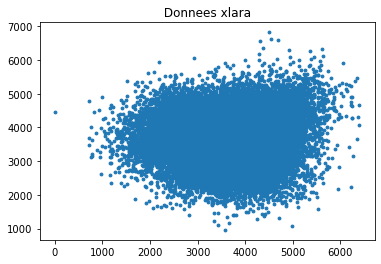

DBSCAN
- Score :  -0.15244544425458043
- Durée d'éxecution :  1153.01  ms
- Nombre de clusters : 13130
- Nombre de points de bruit : 25378


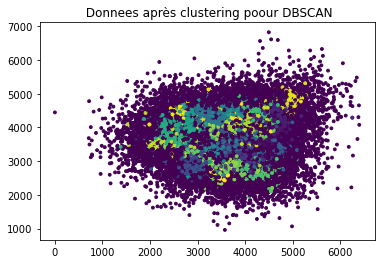

In [72]:
databrut = np.loadtxt(pathbis+'y1.txt')
datanp = [[x[0], x[1]] for x in databrut ]
f0 = [ f[0] for f in datanp]
f1 = [ f[1] for f in datanp]


# DBSCAN
eps = 5
min_samples = 2
tps1 = time.time()
dbscan_model = DBSCAN(eps = eps, min_samples = min_samples).fit(datanp)
tps2 = time.time()
labels = dbscan_model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("DBSCAN")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms")
print("- Nombre de clusters : %d" % n_clusters_)
print("- Nombre de points de bruit : %d" % n_noise_)
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering poour DBSCAN" )
plt . show ()

KMEANS
- Score :  0.37314340623903614
- Durée d'éxecution :  775.53  ms 



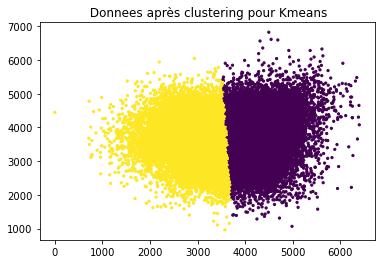

In [74]:
databrut = np.loadtxt(pathbis+'y1.txt')
datanp = [[x[0], x[1]] for x in databrut ]
f0 = [ f[0] for f in datanp]
f1 = [ f[1] for f in datanp]

# Kmeans 
k = 2
tps1 = time.time()
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datanp)
tps2 = time.time()
labels = kmeans_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("KMEANS")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")
plt . scatter ( f0 , f1 , c = labels , s = 5 )
plt . title ( " Donnees après clustering pour Kmeans" )
plt . show ()

AGGLOMERATIF
- Score :  0.6461502482148691
- Durée d'éxecution :  89598.22  ms 



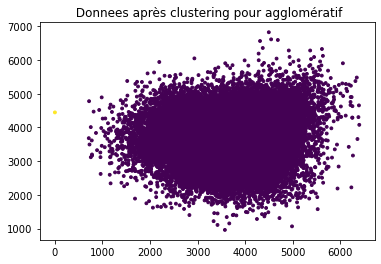

In [77]:
databrut = np.loadtxt(pathbis+'y1.txt')
datanp = [[x[0], x[1]] for x in databrut ]
f0 = [ f[0] for f in datanp]
f1 = [ f[1] for f in datanp]

# Agglomératif
k = 2
tps1 = time . time ()
agglo_model = cluster.AgglomerativeClustering (linkage='single', n_clusters=k).fit(datanp)
tps2 = time . time ()
labels = agglo_model.labels_
score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("AGGLOMERATIF")
print("- Score : ", score)
print("- Durée d'éxecution : ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms \n")
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees après clustering pour agglomératif" )
plt . show ()
